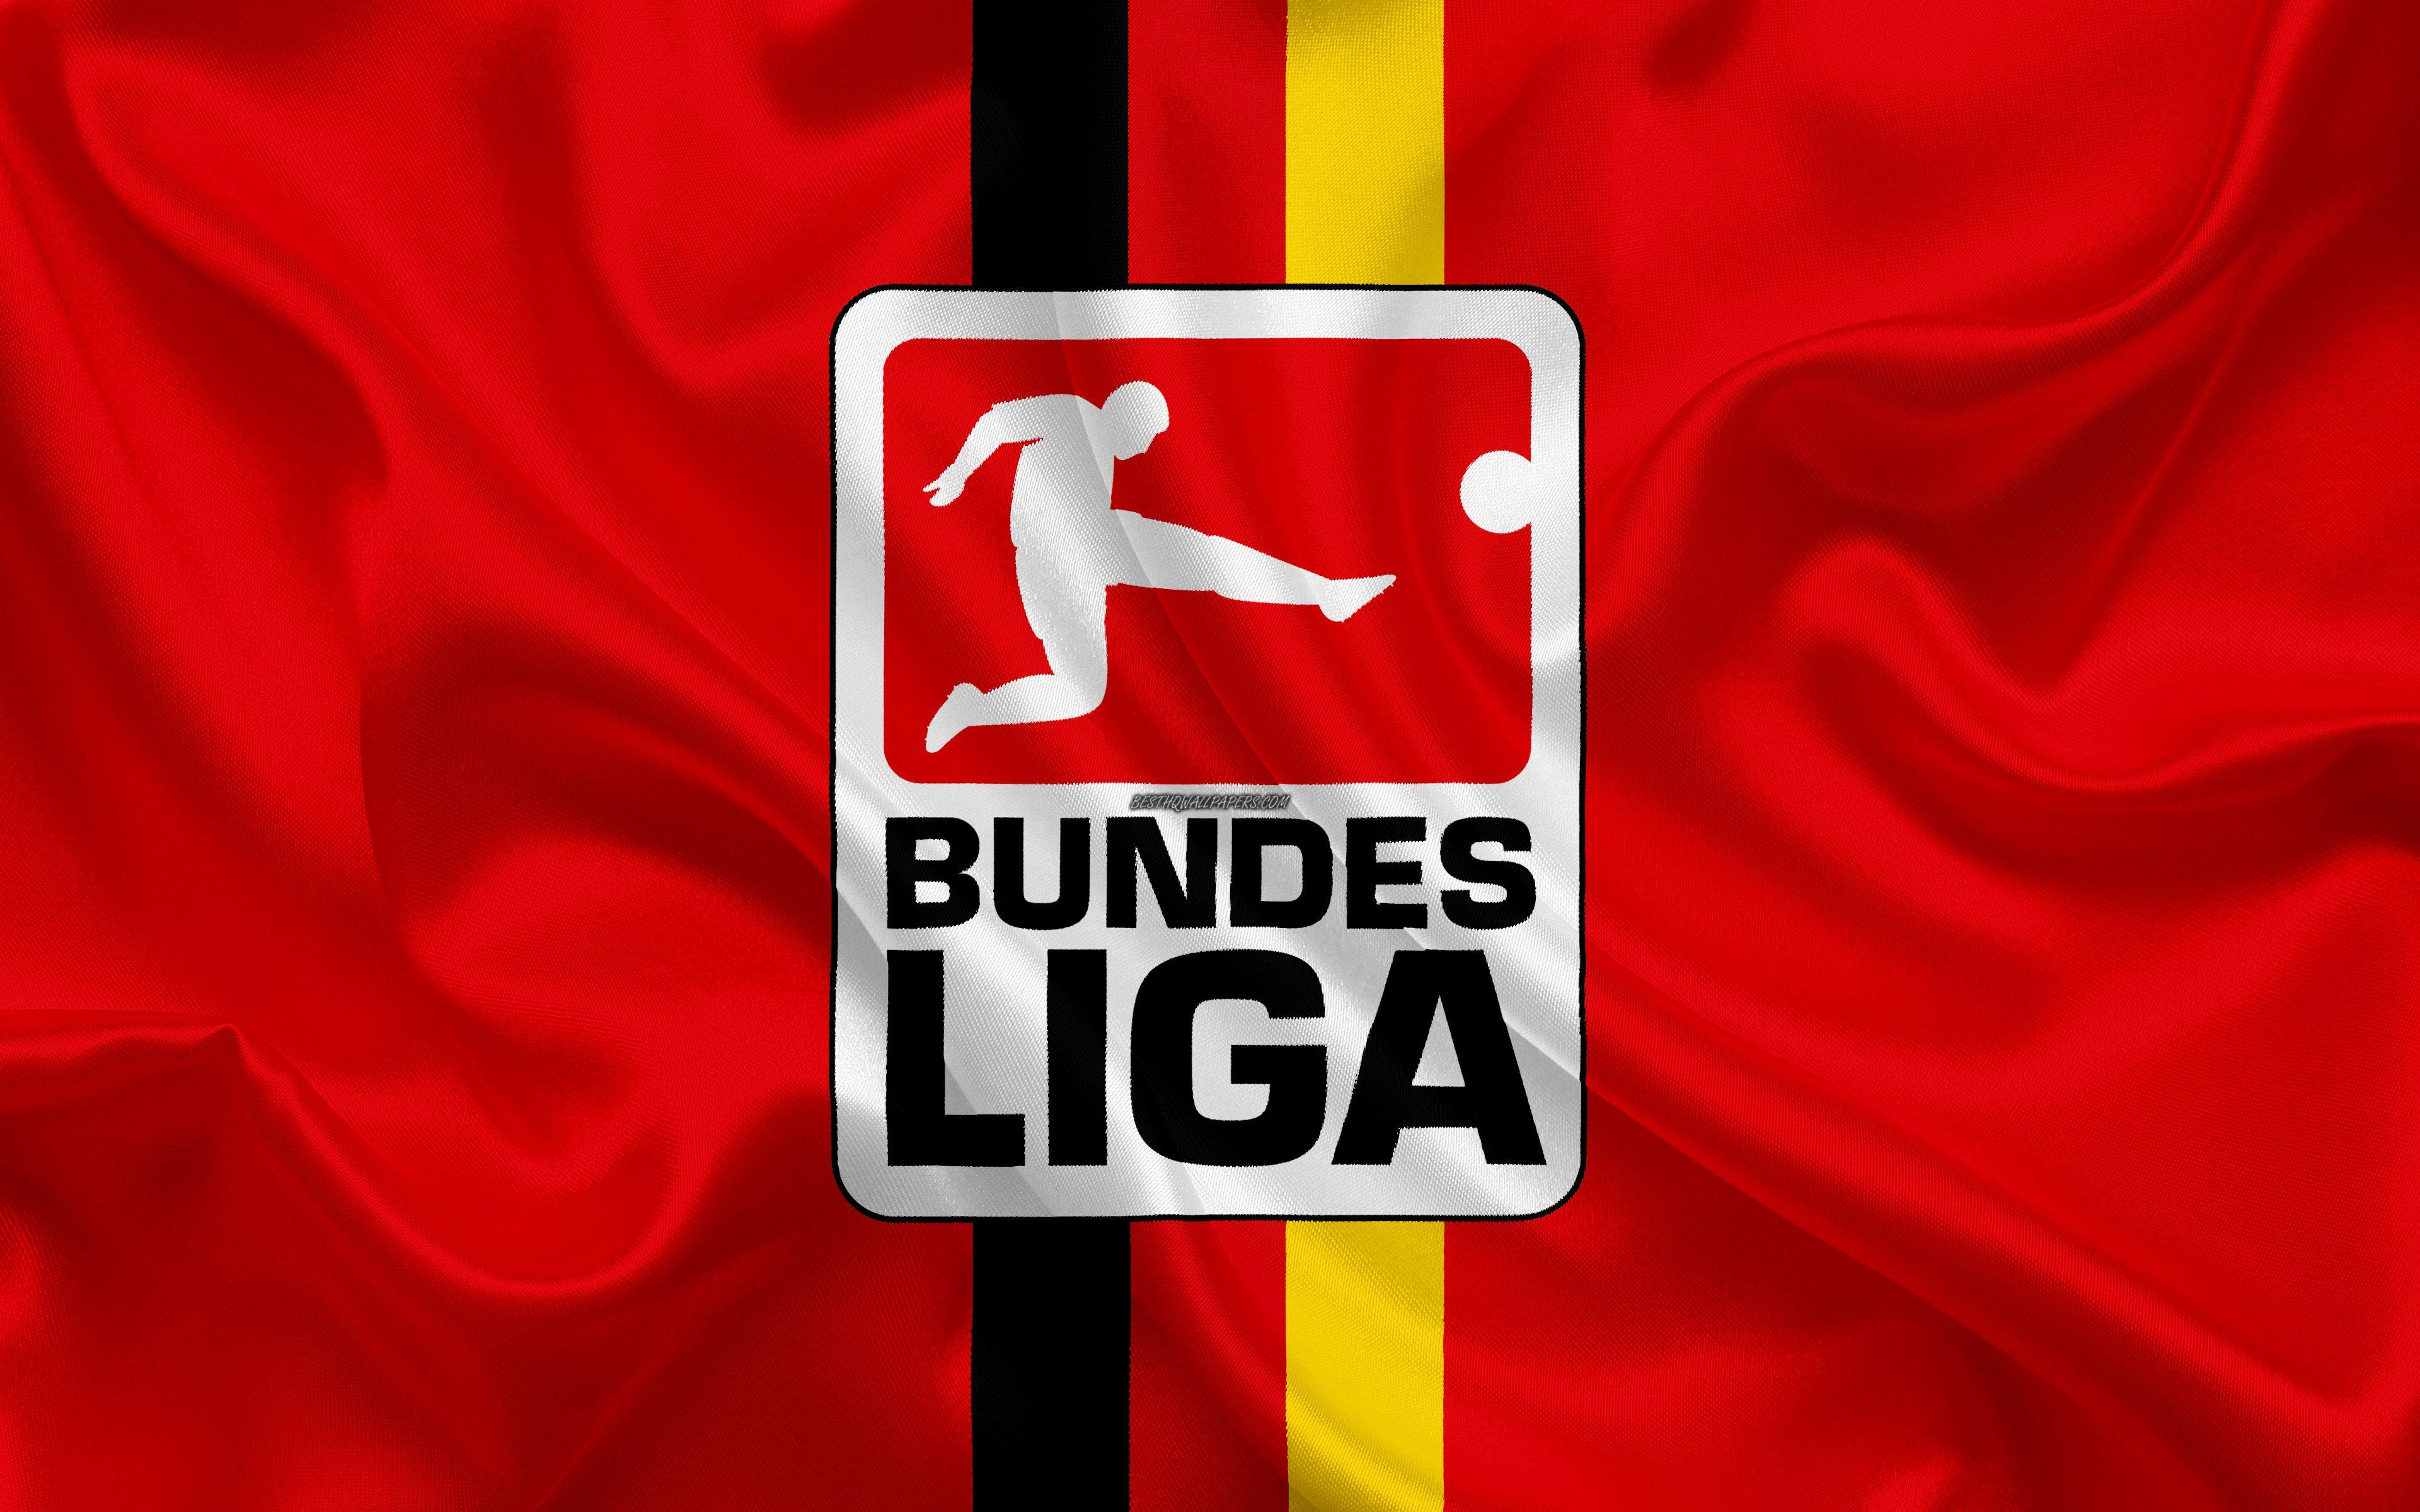

In [54]:
from IPython.display import Image
Image("/workspaces/ProjectDataAnalytics/Bundesliga.jpg", width='1000')


# Bundesliga
Group-Nr. 17

Betim Durmishi<br>
durmibet@students.zhaw.ch<br>
BA.WIN.23HS.VZa

Simon Lindenmann<br>
lindesi2@students.zhaw.ch<br>
BA.WIN.23HS.VZa

Yannick Loretan<br>
loretyan@student.zhaw.ch<br>
BA.WIN.23HS.VZa

# Imports, libraries and setting

In [55]:
# Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import folium

# Ignore Warnings


#Show current working directory
print(os.getcwd())

/workspaces/ProjectDataAnalytics


# Create Dataframes

In [56]:
df_spieler = pd.read_csv('spieler_profil.csv', sep=';')
df_spieler.head()

,Vereinsname,Spieler_id,Name,Geburtsdatum,Spieleralter,Geburtsort,Staatsbuergerschaft,Groesse_in_M,Position,Fuss
0,1.FC Heidenheim 1846,43824,Kevin Muller,15.03.1991,33,Rostock,Deutschland,1.90,Torwart,rechts
1,1.FC Heidenheim 1846,806948,Frank Feller,07.01.2004,21,Leonberg,Deutschland,1.83,Torwart,rechts
2,1.FC Heidenheim 1846,57796,Vitus Eicher,05.11.1990,34,Erding,Deutschland,1.91,Torwart,links
3,1.FC Heidenheim 1846,519035,Paul Tschernuth,20.01.2002,22,Salzburg,Oesterreich,1.86,Torwart,links
4,1.FC Heidenheim 1846,227084,Benedikt Gimber,19.02.1997,27,Buchen,Deutschland,1.87,Abwehr - Innenverteidiger,links


In [57]:
df_seasons = pd.read_csv('combined_seasons.csv', sep=';')
df_seasons.head()

,spieler_id,Wettbewerb_id,Saison,Wettbewerb,Verein,Einsätze,Tore,Torvorlagen,Spiele ohne Gegentor,Eingesetzte Minuten
0,43824,1,'24/25',Bundesliga,1.FC Heidenheim 1846,16,-,NaN,5,1440
1,43824,1,'23/24',Bundesliga,1.FC Heidenheim 1846,34,-,NaN,6,3060
2,43824,1,'22/23',2. Bundesliga,1.FC Heidenheim 1846,34,-,NaN,15,3060
3,43824,1,'21/22',2. Bundesliga,1.FC Heidenheim 1846,34,-,NaN,8,3060
4,43824,1,'20/21',2. Bundesliga,1.FC Heidenheim 1846,33,-,NaN,10,2970


In [58]:
df_value = pd.read_csv('market_value_data.csv', sep=';')
df_value.head()

,player_id,year,market_value
0,133731,2025.00,2956676.14
1,133731,2024.57,2956676.14
2,133731,2023.94,2913352.27
3,133731,2023.45,2913352.27
4,133731,2023.30,2913352.27


# Data preperation

### Reorganise all the market value astimates to average market values per year

In [59]:
# Ergebnisse speichern
result_rows = []

# Spieler-IDs durchlaufen
for player_id in df_value["player_id"].unique():
    # Daten für den aktuellen Spieler filtern
    player_data = df_value[df_value["player_id"] == player_id]

    # Tiefstes Jahr finden und runden
    min_year = player_data["year"].min()
    min_year_rounded = int(round(min_year))

    # Von min_year_rounded bis 2025 iterieren
    for year in range(min_year_rounded, 2026):
        # Daten innerhalb von ±0.5 des aktuellen Jahres filtern
        year_data = player_data[(player_data["year"] > year - 0.5) & (player_data["year"] <= year + 0.5)]

        if len(year_data) > 0:
            # Durchschnitt berechnen, falls Daten vorhanden sind
            avg_market_value = year_data["market_value"].mean()
        else:
            # Durchschnitt aus nächstgelegenen Jahren berechnen
            before_year_data = player_data[player_data["year"] < year]
            after_year_data = player_data[player_data["year"] > year]

            avg_before = before_year_data["market_value"].mean() if len(before_year_data) > 0 else np.nan
            avg_after = after_year_data["market_value"].mean() if len(after_year_data) > 0 else np.nan

            # Durchschnitt von beiden oder nächstliegendem Jahr, falls eins fehlt
            avg_market_value = np.nanmean([avg_before, avg_after])

        # Marktwert auf die nächsten 100 runden
        avg_market_value = round(avg_market_value / 100) * 100 if not np.isnan(avg_market_value) else np.nan

        # Ergebnis speichern
        result_rows.append({
            "player_id": player_id,
            "year": year,
            "avg_market_value": avg_market_value
        })

# Ergebnisse in einen DataFrame umwandeln
result_df = pd.DataFrame(result_rows)
df_value = result_df
# Ausgabe anzeigen
df_value.head(25)


,player_id,year,avg_market_value
0,133731,2012,545000
1,133731,2013,1050400
2,133731,2014,1440300
3,133731,2015,1440300
4,133731,2016,1353700
5,133731,2017,1819400
6,133731,2018,2090200
7,133731,2019,2682300
8,133731,2020,2826700
9,133731,2021,2859200


### Count, identify and remove missing values

In [60]:
# Zeilen mit fehlenden Werten identifizieren und löschen
columns_to_check_spieler = ['Geburtsdatum', 'Spieleralter', 'Geburtsort', 'Staatsbuergerschaft', 'Groesse_in_M', 'Position', 'Fuss']
columns_to_check_seasons = ['Saison', 'Wettbewerb', 'Verein', 'Einsätze', 'Tore', 'Torvorlagen', 'Spiele ohne Gegentor', 'Eingesetzte Minuten']

# Spieler-Daten: Zeilen, die gelöscht werden, identifizieren
deleted_spieler = df_spieler[df_spieler[columns_to_check_spieler].isna().all(axis=1)]
df_spieler_cleaned = df_spieler.dropna(subset=columns_to_check_spieler, how='all')

# Anzeige der gelöschten Zeilen
print("Gelöschte Zeilen in df_spieler:")
display(deleted_spieler)

# Bereinigter df_spieler anzeigen
print("Bereinigter df_spieler DataFrame:")
display(df_spieler_cleaned)

# Saison-Daten: Zeilen, die gelöscht werden, identifizieren
deleted_seasons = df_seasons[df_seasons[columns_to_check_seasons].isna().all(axis=1)]
df_seasons_cleaned = df_seasons.dropna(subset=columns_to_check_seasons, how='all')

# Anzeige der gelöschten Zeilen
print("Gelöschte Zeilen in df_seasons:")
display(deleted_seasons)

# Bereinigter df_seasons anzeigen
print("Bereinigter df_seasons DataFrame:")
display(df_seasons_cleaned)

# bereinigung übertragen
df_seasons = df_seasons_cleaned
df_spieler = df_spieler_cleaned

Gelöschte Zeilen in df_spieler:


,Vereinsname,Spieler_id,Name,Geburtsdatum,Spieleralter,Geburtsort,Staatsbuergerschaft,Groesse_in_M,Position,Fuss
290,Holstein Kiel,651269,Armin Gigovic,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Bereinigter df_spieler DataFrame:


,Vereinsname,Spieler_id,Name,Geburtsdatum,Spieleralter,Geburtsort,Staatsbuergerschaft,Groesse_in_M,Position,Fuss
0,1.FC Heidenheim 1846,43824,Kevin Muller,15.03.1991,33,Rostock,Deutschland,1.90,Torwart,rechts
1,1.FC Heidenheim 1846,806948,Frank Feller,07.01.2004,21,Leonberg,Deutschland,1.83,Torwart,rechts
2,1.FC Heidenheim 1846,57796,Vitus Eicher,05.11.1990,34,Erding,Deutschland,1.91,Torwart,links
3,1.FC Heidenheim 1846,519035,Paul Tschernuth,20.01.2002,22,Salzburg,Oesterreich,1.86,Torwart,links
4,1.FC Heidenheim 1846,227084,Benedikt Gimber,19.02.1997,27,Buchen,Deutschland,1.87,Abwehr - Innenverteidiger,links
...,...,...,...,...,...,...,...,...,...,...
501,VfL Wolfsburg,391004,Jonas Wind,07.02.1999,25,Hvidovre,Daenemark,1.90,Sturm - Mittelstuermer,rechts
502,VfL Wolfsburg,616344,Tiago Tomas,16.06.2002,22,Cascais,Portugal,1.80,Sturm - Mittelstuermer,rechts
503,VfL Wolfsburg,314288,Lukas Nmecha,14.12.1998,26,Hamburg,Deutschland/England,1.85,Sturm - Mittelstuermer,rechts
504,VfL Wolfsburg,117432,Kevin Behrens,03.02.1991,33,Bremen,Deutschland,1.85,Sturm - Mittelstuermer,beidfuessig


Gelöschte Zeilen in df_seasons:


,spieler_id,Wettbewerb_id,Saison,Wettbewerb,Verein,Einsätze,Tore,Torvorlagen,Spiele ohne Gegentor,Eingesetzte Minuten


Bereinigter df_seasons DataFrame:


,spieler_id,Wettbewerb_id,Saison,Wettbewerb,Verein,Einsätze,Tore,Torvorlagen,Spiele ohne Gegentor,Eingesetzte Minuten
0,43824,1,'24/25',Bundesliga,1.FC Heidenheim 1846,16,-,NaN,5,1440
1,43824,1,'23/24',Bundesliga,1.FC Heidenheim 1846,34,-,NaN,6,3060
2,43824,1,'22/23',2. Bundesliga,1.FC Heidenheim 1846,34,-,NaN,15,3060
3,43824,1,'21/22',2. Bundesliga,1.FC Heidenheim 1846,34,-,NaN,8,3060
4,43824,1,'20/21',2. Bundesliga,1.FC Heidenheim 1846,33,-,NaN,10,2970
...,...,...,...,...,...,...,...,...,...,...
14093,535551,2,'22/23',DFB-Pokal,VfL Wolfsburg,-,-,-,NaN,-
14094,535551,2,'20/21',DFB-Pokal,VfL Wolfsburg,4,-,-,NaN,41
14095,535551,2,'19/20',Polnischer Pokal,Zaglebie Lubin,1,-,-,NaN,78
14096,535551,2,'19/20',Polnischer Pokal,Zaglebie Lubin II,1,1,-,NaN,60


### Replace all NaN numerical columns columns with Zero

In [61]:
# Spalten in df_seasons, die mit der Zahl 0 ersetzt werden sollen
columns_to_replace_with_zero = ['Einsätze', 'Tore', 'Torvorlagen', 'Spiele ohne Gegentor', 'Eingesetzte Minuten']

# Nur die spezifischen Spalten anpassen: "-" und NaN durch die Zahl 0 ersetzen
df_seasons[columns_to_replace_with_zero] = df_seasons[columns_to_replace_with_zero].replace("-", 0).fillna(0)

print("df_seasons mit NaN und '-' in spezifischen Spalten durch 0 ersetzt:")
display(df_seasons)

df_seasons mit NaN und '-' in spezifischen Spalten durch 0 ersetzt:


,spieler_id,Wettbewerb_id,Saison,Wettbewerb,Verein,Einsätze,Tore,Torvorlagen,Spiele ohne Gegentor,Eingesetzte Minuten
0,43824,1,'24/25',Bundesliga,1.FC Heidenheim 1846,16,0,0,5,1440
1,43824,1,'23/24',Bundesliga,1.FC Heidenheim 1846,34,0,0,6,3060
2,43824,1,'22/23',2. Bundesliga,1.FC Heidenheim 1846,34,0,0,15,3060
3,43824,1,'21/22',2. Bundesliga,1.FC Heidenheim 1846,34,0,0,8,3060
4,43824,1,'20/21',2. Bundesliga,1.FC Heidenheim 1846,33,0,0,10,2970
...,...,...,...,...,...,...,...,...,...,...
14093,535551,2,'22/23',DFB-Pokal,VfL Wolfsburg,0,0,0,0,0
14094,535551,2,'20/21',DFB-Pokal,VfL Wolfsburg,4,0,0,0,41
14095,535551,2,'19/20',Polnischer Pokal,Zaglebie Lubin,1,0,0,0,78
14096,535551,2,'19/20',Polnischer Pokal,Zaglebie Lubin II,1,1,0,0,60


### Count, identify and remove duplicated values (Variante wie in Vorlesung)

In [62]:
# Count duplicated values in the whole data set
print('Sum of missing values in players:', df_spieler.duplicated().sum(), '\n')
print('Sum of missing values in seasons:', df_seasons.duplicated().sum(), '\n')

# Coount rows
print('Number of rows:', df_spieler.shape[0], '\n')
print('Number of rows:', df_seasons.shape[0], '\n')

# Identify duplicated values in 'Vereinsname', 'Spieler_id', 'Name', 'Geburtsdatum', 'Spieleralter', 'Geburtsort', 'Staatsbuergerschaft', 'Groesse_in_M', 'Position', 'Fuss'
print('Duplicated values in players')
print(df_spieler.loc[df_spieler.duplicated(keep = 'last')])

print('Duplicated values in seasons')
print(df_seasons.loc[df_seasons.duplicated(keep = 'last')])

# Drop the rows with duplicated values
df3 = df_spieler.drop_duplicates()
df4 = df_seasons.drop_duplicates()

Sum of missing values in players: 0 

Sum of missing values in seasons: 0 

Number of rows: 505 

Number of rows: 14098 

Duplicated values in players
Empty DataFrame
Columns: [Vereinsname, Spieler_id, Name, Geburtsdatum, Spieleralter, Geburtsort, Staatsbuergerschaft, Groesse_in_M, Position, Fuss]
Index: []
Duplicated values in seasons
Empty DataFrame
Columns: [spieler_id, Wettbewerb_id, Saison, Wettbewerb, Verein, Einsätze, Tore, Torvorlagen, Spiele ohne Gegentor, Eingesetzte Minuten]
Index: []


### Count, identify and remove duplicated values (Andere Variante)

In [63]:
# Count duplicated values in df_spieler
duplicated_values_spieler = df_spieler.duplicated().sum()
print("Duplicated values in df_spieler:", duplicated_values_spieler)

# Identify duplicated rows in df_spieler
duplicated_rows_spieler = df_spieler[df_spieler.duplicated()]
print("Duplicated rows in df_spieler:\n", duplicated_rows_spieler)

# Remove duplicated rows in df_spieler
df_spieler_cleaned = df_spieler.drop_duplicates()
df_spieler_cleaned.head()

# Count duplicated values in df_seasons
duplicated_values_seasons = df_seasons.duplicated().sum()
print("Duplicated values in df_seasons:", duplicated_values_seasons)

# Identify duplicated rows in df_seasons
duplicated_rows_seasons = df_seasons[df_seasons.duplicated()]
print("Duplicated rows in df_seasons:\n", duplicated_rows_seasons)

# Remove duplicated rows in df_seasons
df_seasons_cleaned = df_seasons.drop_duplicates()
df_seasons_cleaned.head()

Duplicated values in df_spieler: 0
Duplicated rows in df_spieler:
 Empty DataFrame
Columns: [Vereinsname, Spieler_id, Name, Geburtsdatum, Spieleralter, Geburtsort, Staatsbuergerschaft, Groesse_in_M, Position, Fuss]
Index: []
Duplicated values in df_seasons: 0
Duplicated rows in df_seasons:
 Empty DataFrame
Columns: [spieler_id, Wettbewerb_id, Saison, Wettbewerb, Verein, Einsätze, Tore, Torvorlagen, Spiele ohne Gegentor, Eingesetzte Minuten]
Index: []


,spieler_id,Wettbewerb_id,Saison,Wettbewerb,Verein,Einsätze,Tore,Torvorlagen,Spiele ohne Gegentor,Eingesetzte Minuten
0,43824,1,'24/25',Bundesliga,1.FC Heidenheim 1846,16,0,0,5,1440
1,43824,1,'23/24',Bundesliga,1.FC Heidenheim 1846,34,0,0,6,3060
2,43824,1,'22/23',2. Bundesliga,1.FC Heidenheim 1846,34,0,0,15,3060
3,43824,1,'21/22',2. Bundesliga,1.FC Heidenheim 1846,34,0,0,8,3060
4,43824,1,'20/21',2. Bundesliga,1.FC Heidenheim 1846,33,0,0,10,2970


In [64]:
print("Duplicated rows in df_spieler:\n", duplicated_rows_spieler)

# Remove duplicated rows in df_spieler
df_spieler_cleaned = df_spieler.drop_duplicates()
df_spieler_cleaned.head()

# Count duplicated values in df_seasons
duplicated_values_seasons = df_seasons.duplicated().sum()
print("Duplicated values in df_seasons:", duplicated_values_seasons)

# Identify duplicated rows in df_seasons
duplicated_rows_seasons = df_seasons[df_seasons.duplicated()]
print("Duplicated rows in df_seasons:\n", duplicated_rows_seasons)

# Remove duplicated rows in df_seasons
df_seasons_cleaned = df_seasons.drop_duplicates()
df_seasons_cleaned.head()

df_seasons = df_seasons_cleaned
df_spieler = df_spieler_cleaned

Duplicated rows in df_spieler:
 Empty DataFrame
Columns: [Vereinsname, Spieler_id, Name, Geburtsdatum, Spieleralter, Geburtsort, Staatsbuergerschaft, Groesse_in_M, Position, Fuss]
Index: []
Duplicated values in df_seasons: 0
Duplicated rows in df_seasons:
 Empty DataFrame
Columns: [spieler_id, Wettbewerb_id, Saison, Wettbewerb, Verein, Einsätze, Tore, Torvorlagen, Spiele ohne Gegentor, Eingesetzte Minuten]
Index: []


### convert the data to the right datatyp

In [65]:
columns_to_convert_to_int = ['Einsätze', 'Tore', 'Torvorlagen', 'Spiele ohne Gegentor', 'Eingesetzte Minuten']

for col in columns_to_convert_to_int:
    df_seasons[col] = pd.to_numeric(df_seasons[col], downcast='integer', errors='coerce').fillna(0).astype(int)

df_spieler['Spieleralter'] = pd.to_numeric(df_spieler['Spieleralter'], downcast='integer', errors='coerce').fillna(0).astype(int)

df_spieler['Groesse_in_M'] = pd.to_numeric(df_spieler['Groesse_in_M'], downcast='float', errors='coerce').fillna(0.0).astype(float)


### Create new variables, enrich the data with open data

Ideen:
(siehe Beispiele in "apartments_data_preparation_zuerich.html" in https://moodle.zhaw.ch/mod/folder/view.php?id=1492311 Week 03)

erst ist import von Rohdaten notwendig aus öffentlichen Quellen.

true oder false für "Teilnahme an europäischen Clubwettbewerb"


### Adding new Variable difference to market value data to see the change of value per year

In [66]:
df_value_with_difference = df_value.copy()

df_value_with_difference['difference'] = df_value_with_difference.groupby('player_id')['avg_market_value'].diff()

# first value always 0 because it should not influence the data
df_value_with_difference['difference'] = df_value_with_difference['difference'].fillna(0)

print(df_value_with_difference.head())


   player_id  year  avg_market_value  difference
0     133731  2012            545000         0.0
1     133731  2013           1050400    505400.0
2     133731  2014           1440300    389900.0
3     133731  2015           1440300         0.0
4     133731  2016           1353700    -86600.0


### Adding new variables to data stored in new df to simlify later analisation

In [67]:
df_seasons_extended = df_seasons.copy()

df_seasons_extended['Minutes per Goal'] = df_seasons_extended.apply(
    lambda row: row['Eingesetzte Minuten'] / row['Tore'] if row['Tore'] > 0 else None, axis=1
)

df_seasons_extended['Minutes per Assist'] = df_seasons_extended.apply(
    lambda row: row['Eingesetzte Minuten'] / row['Torvorlagen'] if row['Torvorlagen'] > 0 else None, axis=1
)

df_seasons_extended['Clean Sheet Percentage'] = df_seasons_extended.apply(
    lambda row: (row['Spiele ohne Gegentor'] / row['Einsätze']) * 100 if row['Einsätze'] > 0 else None, axis=1
)

print(df_seasons_extended[['Eingesetzte Minuten', 'Tore', 'Torvorlagen', 'Spiele ohne Gegentor', 'Einsätze',
                           'Minutes per Goal', 'Minutes per Assist', 'Clean Sheet Percentage']].head())


   Eingesetzte Minuten  Tore  Torvorlagen  Spiele ohne Gegentor  Einsätze  \
0                 1440     0            0                     5        16   
1                 3060     0            0                     6        34   
2                 3060     0            0                    15        34   
3                 3060     0            0                     8        34   
4                 2970     0            0                    10        33   

   Minutes per Goal  Minutes per Assist  Clean Sheet Percentage  
0               NaN                 NaN               31.250000  
1               NaN                 NaN               17.647059  
2               NaN                 NaN               44.117647  
3               NaN                 NaN               23.529412  
4               NaN                 NaN               30.303030  


### making seasonly and all time stats for every player for later

In [68]:
seasonly_stats = df_seasons_extended.groupby(['spieler_id', 'Saison']).agg({
    'Einsätze': 'sum',
    'Eingesetzte Minuten': 'sum',
    'Tore': 'sum',
    'Torvorlagen': 'sum',
    'Spiele ohne Gegentor': 'sum',
    'Minutes per Goal': 'mean',
    'Minutes per Assist': 'mean',
    'Clean Sheet Percentage': 'mean'
}).reset_index()

print("Seasonly stats per player:")
print(seasonly_stats.head())

all_time_stats = df_seasons_extended.groupby('spieler_id').agg({
    'Einsätze': 'sum',
    'Eingesetzte Minuten': 'sum',
    'Tore': 'sum',
    'Torvorlagen': 'sum',
    'Spiele ohne Gegentor': 'sum',
    'Minutes per Goal': 'mean',
    'Minutes per Assist': 'mean',
    'Clean Sheet Percentage': 'mean'
}).reset_index()

print("\nAll time club football stats per player:")
print(all_time_stats.head(8))


Seasonly stats per player:
   spieler_id   Saison  Einsätze  Eingesetzte Minuten  Tore  Torvorlagen  \
0        7161  '08/09'        25                 2063     6            1   
1        7161  '09/10'        25                 1918     8            0   
2        7161  '10/11'        26                 2018    11            2   
3        7161  '11/12'        35                 2672    10           11   
4        7161  '12/13'        38                 3067     5            6   

   Spiele ohne Gegentor  Minutes per Goal  Minutes per Assist  \
0                     0        343.833333         2063.000000   
1                     0        185.428571                 NaN   
2                     0        176.208333          919.000000   
3                     0        267.200000          242.909091   
4                     0        579.400000          374.700000   

   Clean Sheet Percentage  
0                     0.0  
1                     0.0  
2                     0.0  
3            

### Getting stats per Position

In [69]:
stats_per_position = seasonly_stats.merge(df_spieler[['Spieler_id', 'Position', 'Groesse_in_M']], 
                                          left_on='spieler_id', 
                                          right_on='Spieler_id', 
                                          how='left')

position_stats = stats_per_position.groupby('Position').agg({
    'Tore': 'sum',  
    'Torvorlagen': 'sum',  
    'Groesse_in_M': 'mean'  
}).reset_index()

position_stats.rename(columns={
    'Tore': 'Total Goals',
    'Torvorlagen': 'Total Assists',
    'Groesse_in_M': 'Average Size (m)'
}, inplace=True)

print("Position Statistics (Goals, Assists, Average Size):")
display(position_stats)


Position Statistics (Goals, Assists, Average Size):


,Position,Total Goals,Total Assists,Average Size (m)
0,Abwehr - Innenverteidiger,1206,688,1.896709
1,Abwehr - Linker Verteidiger,491,857,1.791650
2,Abwehr - Rechter Verteidiger,739,1067,1.818092
3,Mittelfeld - Defensives Mittelfeld,859,801,1.830573
4,Mittelfeld - Linkes Mittelfeld,132,150,1.842564
5,Mittelfeld - Offensives Mittelfeld,1939,1643,1.800853
6,Mittelfeld - Rechtes Mittelfeld,137,145,1.752553
7,Mittelfeld - Zentrales Mittelfeld,1870,1822,1.816729
8,Sturm - Haengende Spitze,575,432,1.854035
9,Sturm - Linksaussen,1776,1219,1.805769


# Data storage in database

### Create database

### Create ...-table in the database

### Read data from file to data frame

### Write data to the ...-table in data base

### Query the ...-table

# EDA

## Univariete Non-Graphical EDA

### Time played per goal

In [70]:
# Saison- und Marktwert-Daten zusammenführen
seasonly_stats_with_value = seasonly_stats.merge(
    df_value[['spieler_id', 'Saison', 'avg_market_value']],
    on=['spieler_id', 'Saison'],
    how='left'
)

# Berechnung der Goals pro Saison und durchschnittlicher Marktwert
goals_per_season = seasonly_stats_with_value.groupby('Saison').agg({
    'Tore': 'sum',
    'avg_market_value': 'mean'
}).reset_index()

# Spalte für Tore pro Saison erstellen
goals_per_season.rename(columns={
    'Tore': 'Total Goals',
    'avg_market_value': 'Average Market Value (€)'
}, inplace=True)

# Ergebnisse anzeigen
print("Goals per Season with Average Market Value:")
display(goals_per_season)

# Korrelation zwischen Goals und Marktwert berechnen
from scipy.stats import pearsonr

correlation, p_value = pearsonr(goals_per_season['Total Goals'], goals_per_season['Average Market Value (€)'])

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=goals_per_season,
    x='Total Goals',
    y='Average Market Value (€)',
    s=100,
    color='blue',
    alpha=0.7
)
plt.title(f"Goals vs. Market Value\nCorrelation: {correlation:.2f}, p-value: {p_value:.2e}", fontsize=14, fontweight='bold')
plt.xlabel("Total Goals per Season", fontsize=12)
plt.ylabel("Average Market Value (€)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Ergebnisse ausgeben
print(f"Korrelation zwischen Total Goals und Average Market Value: {correlation:.2f}")
print(f"P-Wert: {p_value:.2e}")


KeyError: "['spieler_id', 'Saison'] not in index"

### Get no weak footed players and what position most play in

In [1149]:
# Daten filtern: Nur beidfüßige Spieler
df_beidfüssig = df_spieler[df_spieler['Fuss'] == 'beidfuessig']

# Überprüfen, ob es überhaupt beidfüßige Spieler gibt
if not df_beidfüssig.empty:
    # Anzahl der beidfüßigen Spieler pro Position berechnen
    beidfüssig_position = df_beidfüssig.groupby('Position').size().reset_index(name='Anzahl Beidfüßige Spieler')

    # Position mit den meisten beidfüßigen Spielern identifizieren
    max_position = beidfüssig_position.loc[beidfüssig_position['Anzahl Beidfüßige Spieler'].idxmax()]

    # Ergebnisse anzeigen
    print(f"Position mit den meisten beidfüßigen Spielern:")
    print(f"{max_position['Position']} mit {max_position['Anzahl Beidfüßige Spieler']} beidfüßigen Spielern")

    # Tabelle der Ergebnisse anzeigen
    beidfüssig_position = beidfüssig_position.sort_values(by='Anzahl Beidfüßige Spieler', ascending=False)
    display(beidfüssig_position)
else:
    print("Es gibt keine beidfüßigen Spieler in den Daten.")


Position mit den meisten beidfüßigen Spielern:
Torwart mit 8 beidfüßigen Spielern


,Position,Anzahl Beidfüßige Spieler
9,Torwart,8
7,Sturm - Mittelstuermer,5
3,Mittelfeld - Offensives Mittelfeld,4
1,Abwehr - Rechter Verteidiger,3
6,Sturm - Linksaussen,3
0,Abwehr - Innenverteidiger,2
2,Mittelfeld - Defensives Mittelfeld,2
8,Sturm - Rechtsaussen,2
5,Sturm - Haengende Spitze,1
4,Mittelfeld - Zentrales Mittelfeld,1


### Contingency table getting the relation from the total to the positions in percent

In [ ]:
selected_season = "'24/25'"  
seasonly_stats_filtered = seasonly_stats[seasonly_stats['Saison'] == selected_season]

stats_per_position_season = seasonly_stats_filtered.merge(
    df_spieler[['Spieler_id', 'Position']],
    left_on='spieler_id',
    right_on='Spieler_id',
    how='left'
)

position_stats_season = stats_per_position_season.groupby('Position').agg({
    'Tore': 'sum',
    'Torvorlagen': 'sum',
}).reset_index()

total_goals = position_stats_season['Tore'].sum()
total_assists = position_stats_season['Torvorlagen'].sum()

position_stats_season['Goals (%)'] = (position_stats_season['Tore'] / total_goals) * 100
position_stats_season['Assists (%)'] = (position_stats_season['Torvorlagen'] / total_assists) * 100

position_stats_season.rename(columns={
    'Tore': 'Total Goals',
    'Torvorlagen': 'Total Assists',
}, inplace=True)

print(f"Position Statistics for Season {selected_season} (Goals %, Assists %):")
display(position_stats_season)


Position Statistics for Season '24/25' (Goals %, Assists %):


,Position,Total Goals,Total Assists,Goals (%),Assists (%)
0,Abwehr - Innenverteidiger,46,36,6.108898,5.990017
1,Abwehr - Linker Verteidiger,24,47,3.187251,7.820300
2,Abwehr - Rechter Verteidiger,28,36,3.718459,5.990017
3,Mittelfeld - Defensives Mittelfeld,23,33,3.054449,5.490849
4,Mittelfeld - Linkes Mittelfeld,3,10,0.398406,1.663894
5,Mittelfeld - Offensives Mittelfeld,102,78,13.545817,12.978369
6,Mittelfeld - Rechtes Mittelfeld,7,18,0.929615,2.995008
7,Mittelfeld - Zentrales Mittelfeld,63,62,8.366534,10.316140
8,Sturm - Haengende Spitze,18,8,2.390438,1.331115
9,Sturm - Linksaussen,79,80,10.491368,13.311148


### Guessing the amount of goals and assists with help of the percenteges of a other year

In [1151]:
selected_season = "'22/23'"  # Beispiel für die Saison '22/23'
seasonly_stats_filtered = seasonly_stats[seasonly_stats['Saison'] == selected_season]

# Daten mit Spielerinformationen zusammenführen
stats_per_position_season = seasonly_stats_filtered.merge(
    df_spieler[['Spieler_id', 'Position']],
    left_on='spieler_id',
    right_on='Spieler_id',
    how='left'
)

# Statistiken für die ausgewählte Saison berechnen
position_stats_season_2 = stats_per_position_season.groupby('Position').agg({
    'Tore': 'sum',
    'Torvorlagen': 'sum',
}).reset_index()

# Prozente berechnen
total_goals = position_stats_season_2['Tore'].sum()
total_assists = position_stats_season_2['Torvorlagen'].sum()

position_stats_season_2['Goals expected'] = (position_stats_season['Goals (%)'] * total_goals) / 100
position_stats_season_2['Assists expected'] = (position_stats_season['Assists (%)'] * total_assists) / 100

# Umbenennen der Spalten für bessere Lesbarkeit
position_stats_season_2.rename(columns={
    'Tore': 'Total Goals',
    'Torvorlagen': 'Total Assists',
}, inplace=True)

# Ergebnisse anzeigen
print(f"Position Statistics for Season {selected_season} (Goals expected, Assists expected):")
display(position_stats_season_2)



Position Statistics for Season '22/23' (Goals expected, Assists expected):


,Position,Total Goals,Total Assists,Goals expected,Assists expected
0,Abwehr - Innenverteidiger,126,87,116.069057,81.524126
1,Abwehr - Linker Verteidiger,58,123,60.557769,106.434276
2,Abwehr - Rechter Verteidiger,64,90,70.650730,81.524126
3,Mittelfeld - Defensives Mittelfeld,79,75,58.034529,74.730449
4,Mittelfeld - Linkes Mittelfeld,8,25,7.569721,22.645591
5,Mittelfeld - Offensives Mittelfeld,300,238,257.370518,176.635607
6,Mittelfeld - Rechtes Mittelfeld,34,23,17.662683,40.762063
7,Mittelfeld - Zentrales Mittelfeld,171,153,158.964143,140.402662
8,Sturm - Haengende Spitze,37,31,45.418327,18.116473
9,Sturm - Linksaussen,276,166,199.335989,181.164725


### Chi-squared test

In [1152]:
from scipy.stats import chi2_contingency

actual_goals = position_stats_season_2['Total Goals']
expected_goals = position_stats_season_2['Goals expected']

actual_assists = position_stats_season_2['Total Assists']
expected_assists = position_stats_season_2['Assists expected']

valid_goals = (expected_goals > 0) & (actual_goals > 0)
filtered_actual_goals = actual_goals[valid_goals]
filtered_expected_goals = expected_goals[valid_goals]

valid_assists = (expected_assists > 0) & (actual_assists > 0)
filtered_actual_assists = actual_assists[valid_assists]
filtered_expected_assists = expected_assists[valid_assists]

chi2_goals, p_goals, dof_goals, expected_goals_chi2 = chi2_contingency(
    [filtered_actual_goals, filtered_expected_goals]
)

chi2_assists, p_assists, dof_assists, expected_assists_chi2 = chi2_contingency(
    [filtered_actual_assists, filtered_expected_assists]
)

print(f"Chi-Squared Test for Goals:\nStatistic: {chi2_goals:.2f}, p-value: {p_goals:.4f}, Degrees of Freedom: {dof_goals}")
print(f"Chi-Squared Test for Assists:\nStatistic: {chi2_assists:.2f}, p-value: {p_assists:.4f}, Degrees of Freedom: {dof_assists}")

if p_goals < 0.05:
    print("The results suggest a significant relationship between expected and actual goal distribution.")
else:
    print("The results suggest no significant relationship between expected and actual goal distribution.")

if p_assists < 0.05:
    print("The results suggest a significant relationship between expected and actual assist distribution.")
else:
    print("The results suggest no significant relationship between expected and actual assist distribution.")


Chi-Squared Test for Goals:
Statistic: 43.65, p-value: 0.0000, Degrees of Freedom: 11
Chi-Squared Test for Assists:
Statistic: 30.80, p-value: 0.0012, Degrees of Freedom: 11
The results suggest a significant relationship between expected and actual goal distribution.
The results suggest a significant relationship between expected and actual assist distribution.


As expected the position has a big influence on how many goals or assist are contributed every season.

## Multivariate Graphical EDA

### correlation analysis of Scatterplot

Korrelation zwischen Größe und Torwart-Position: 0.23
p-Wert: 1.70e-07


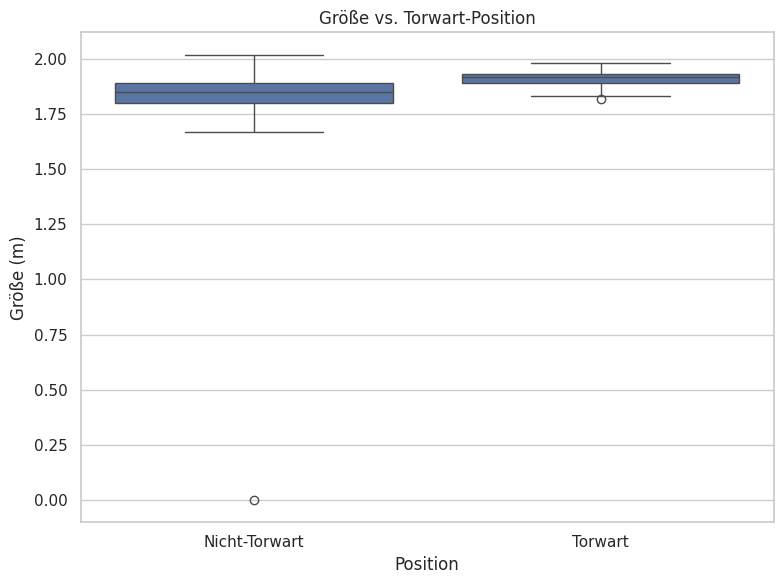

In [1154]:
df_torwart = df_spieler.copy()
df_torwart['Is_Torwart'] = df_torwart['Position'].apply(lambda x: 1 if 'Torwart' in x else 0)

# Korrelation berechnen
correlation, p_value = pearsonr(df_torwart['Groesse_in_M'], df_torwart['Is_Torwart'])

# Ausgabe der Korrelation
print(f"Korrelation zwischen Größe und Torwart-Position: {correlation:.2f}")
print(f"p-Wert: {p_value:.2e}")

# Visualisierung
plt.figure(figsize=(8, 6))
sns.boxplot(x='Is_Torwart', y='Groesse_in_M', data=df_torwart)
plt.xticks([0, 1], ['Nicht-Torwart', 'Torwart'])
plt.title('Größe vs. Torwart-Position')
plt.xlabel('Position')
plt.ylabel('Größe (m)')
plt.tight_layout()
plt.show()

You can see a huge difference between a goalkeepers hight and a not goalkeepers height there average is higher but especially intresting is that there is aparently no goalkeeper under 185 but still the tallest is a non-goalkeeper.

## Histograms

### Appearances of the entire dataset

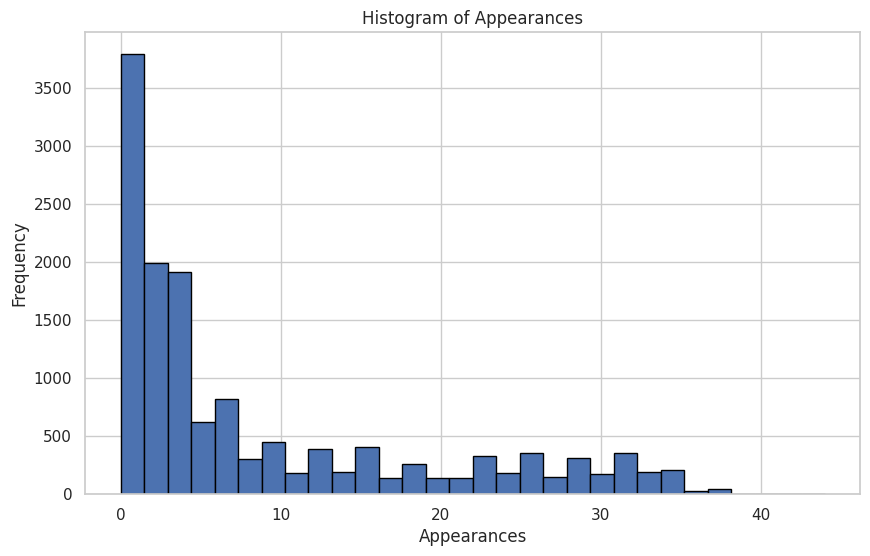

In [ ]:
# Sicherstellen, dass alle Werte in 'Einsätze' numerisch sind
df_seasons['Einsätze'] = pd.to_numeric(df_seasons['Einsätze'], errors='coerce')

# Fehlende Werte entfernen
df_seasons_cleaned = df_seasons.dropna(subset=['Einsätze'])

# Histogramm erstellen
plt.figure(figsize=(10, 6))
plt.hist(df_seasons_cleaned['Einsätze'], bins=30, edgecolor='black')
plt.title('Histogram of Appearances')
plt.xlabel('Appearances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### The histogram shows a right-skewed distribution, indicating that many players have few appearances while only a few play regularly.

### Minutes played of the entire dataset

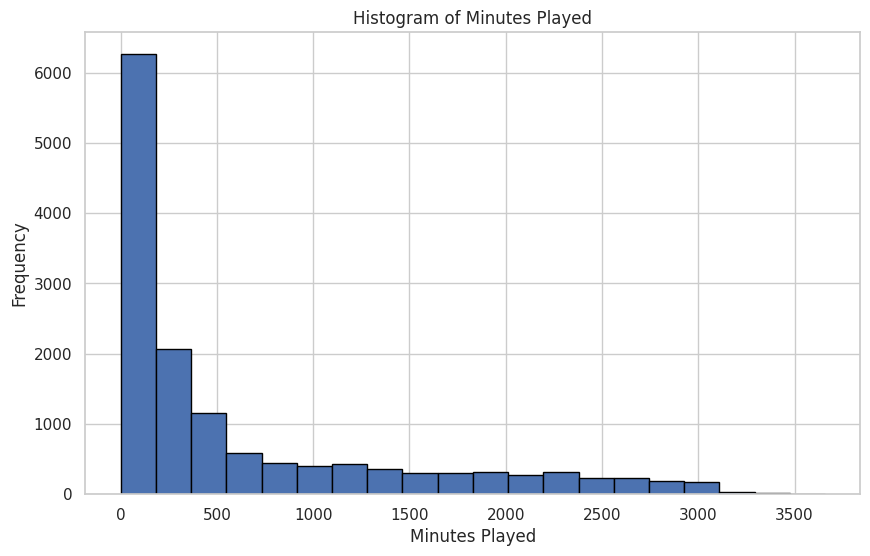

In [ ]:
df_seasons['Eingesetzte Minuten'] = pd.to_numeric(df_seasons['Eingesetzte Minuten'], errors='coerce')

cleaned_minutes = df_seasons['Eingesetzte Minuten'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(cleaned_minutes, bins=20, edgecolor='black') 
plt.title('Histogram of Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### The histogram shows a right-skewed distribution, indicating that most players have few minutes played, while only a few accumulate a high number of minutes.

### Market Value of the entire dataset

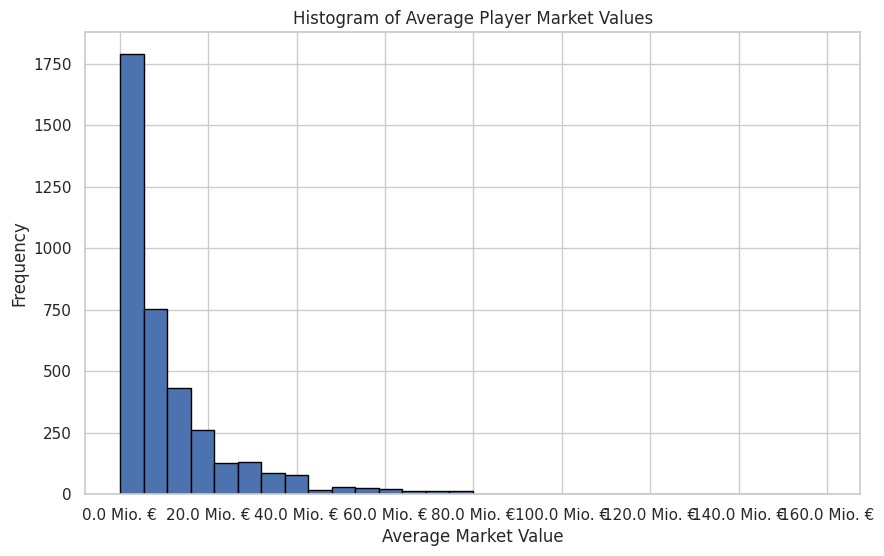

In [ ]:
# Daten zusammenführen: Spielerprofil mit Marktwerten verknüpfen
df_merged = pd.merge(df_value, df_spieler, how='left', left_on='player_id', right_on='Spieler_id')

# Histogramm der Marktwerte erstellen
plt.figure(figsize=(10, 6))
plt.hist(df_merged['avg_market_value'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Average Player Market Values')
plt.xlabel('Average Market Value')
plt.ylabel('Frequency')
plt.grid(True)
# X-Achse in Millionen formatieren
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-6:.1f} Mio. €'))

plt.show()

#### The histogram shows a right-skewed distribution, with most players having low market values and only a few reaching extremely high values.

## Boxplots

### Boxplot of Appearances of the entire dataset

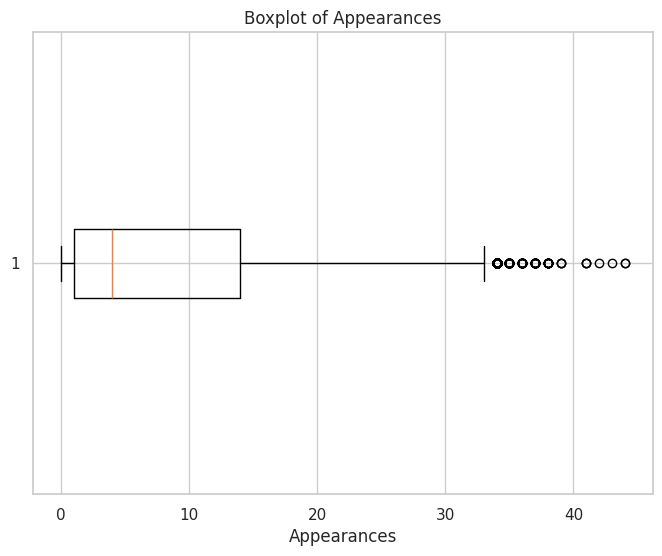

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_seasons['Einsätze'].dropna(), vert=False)
plt.title('Boxplot of Appearances')
plt.xlabel('Appearances')
plt.grid(True)
plt.show()

#### The boxplot of appearances shows that most players have between 0 and 10 appearances, with a median around 3, while a few outliers exceed 30 appearances, indicating that only a small number of players consistently participate in matches.

### Boxplot of minutes played of the entire dataset

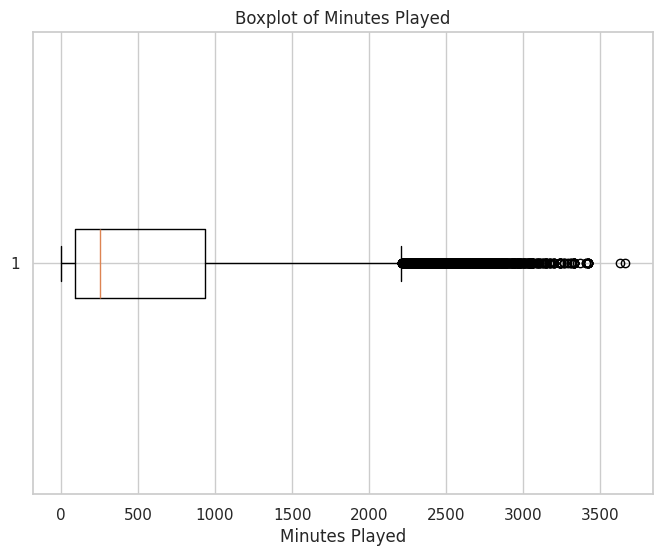

In [ ]:

df_seasons['Eingesetzte Minuten'] = pd.to_numeric(df_seasons['Eingesetzte Minuten'], errors='coerce')

cleaned_minutes = df_seasons['Eingesetzte Minuten'].dropna()

plt.figure(figsize=(8, 6))
plt.boxplot(cleaned_minutes, vert=False)
plt.title('Boxplot of Minutes Played')
plt.xlabel('Minutes Played')
plt.grid(True)
plt.show()

#### The boxplot of minutes played shows that most players accumulate between 0 and 1,000 minutes, with a median around 400 minutes, while a few outliers exceed 2,500 minutes, highlighting that only a small group of players consistently play full matches.

### Boxplot of average market value of the entire dataset

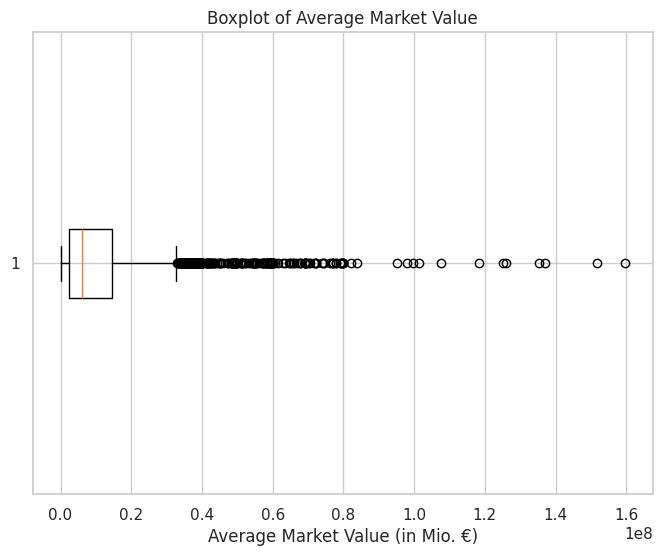

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_merged['avg_market_value'].dropna(), vert=False)
plt.title('Boxplot of Average Market Value')
plt.xlabel('Average Market Value (in Mio. €)')
plt.grid(True)

plt.show()

#### The boxplot of average market value shows that most players have a market value below €20 million, with a median significantly lower, while a few outliers exceed €100 million, indicating that only a small number of elite players hold exceptionally high market values.

## Pie Chart

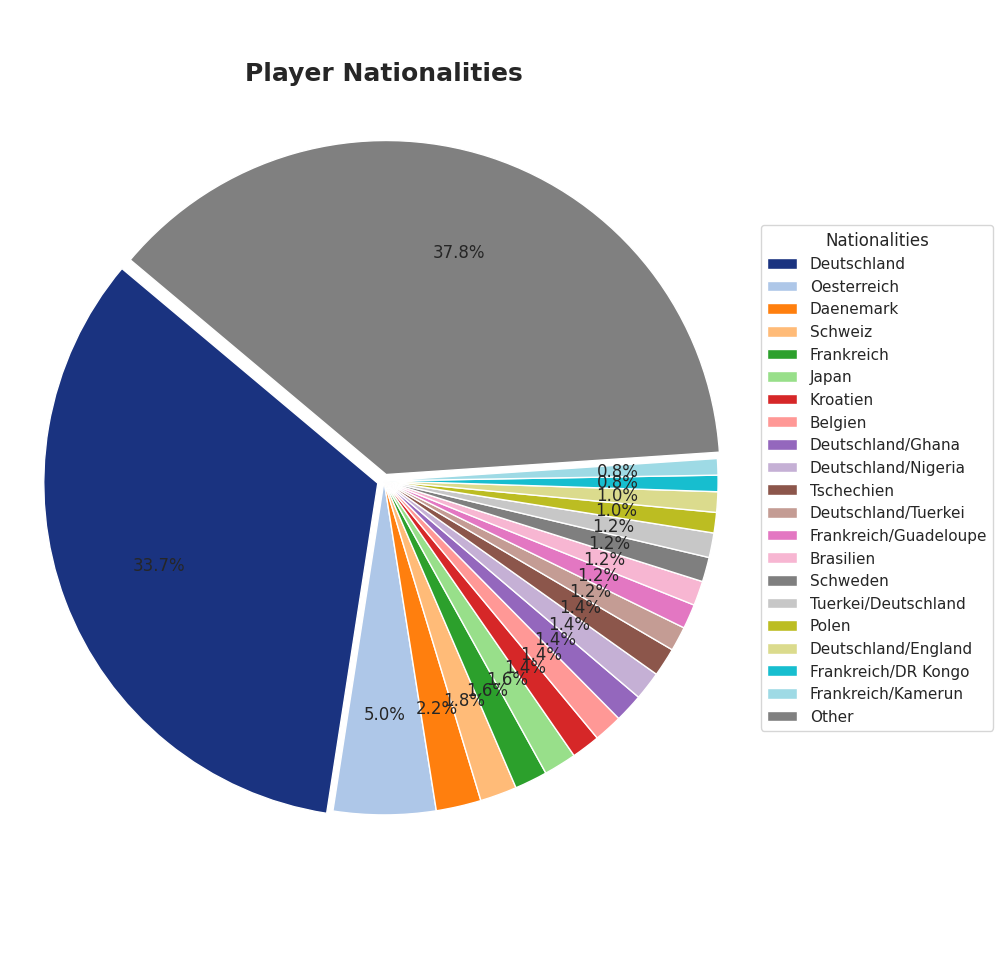

In [ ]:
# Nationalitäten zählen
nationalities_counts = df_spieler['Staatsbuergerschaft'].value_counts()

# Top 20 Nationalitäten und den Rest als "Andere" zusammenfassen
top_20_nationalities = nationalities_counts.head(20)
other_nationalities = nationalities_counts[20:].sum()

# Daten für das Pie Chart vorbereiten
nationalities_combined = pd.concat([top_20_nationalities, pd.Series({'Other': other_nationalities})])

# Individuelle Farben festlegen, um "Deutschland" und "Other" zu unterscheiden
colors = list(plt.cm.tab20.colors)
colors[0] = (0.1, 0.2, 0.5)  # Deutschland in Dunkelblau
colors.append((0.5, 0.5, 0.5))  # Other in Grau

# Explode-Effekt, um die Segmente leicht auseinanderzuziehen
explode = [0.02 if nationality in ['Deutschland', 'Other'] else 0 for nationality in nationalities_combined.index]

# Bündiges Pie Chart mit Beschriftungen innerhalb der Segmente erstellen
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    nationalities_combined,
    labels=None,
    colors=colors,
    explode=explode,
    autopct='%1.1f%%',
    startangle=140,
    shadow=False,
    pctdistance=0.7,  # Prozentangaben näher an der Mitte
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}  # Weiße Trennlinien
)

# Legende hinzufügen
plt.legend(wedges, nationalities_combined.index, title="Nationalities", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Titel in den oberen Bereich des Diagramms setzen
plt.text(0, 1.2, 'Player Nationalities', fontsize=18, weight='bold', ha='center')
plt.axis('equal')  # Sicherstellen, dass der Kreis bündig ist
plt.tight_layout(pad=0.5)
plt.show()

## Line Chart

### Line Chart Goals per Season of Jamal Musiala

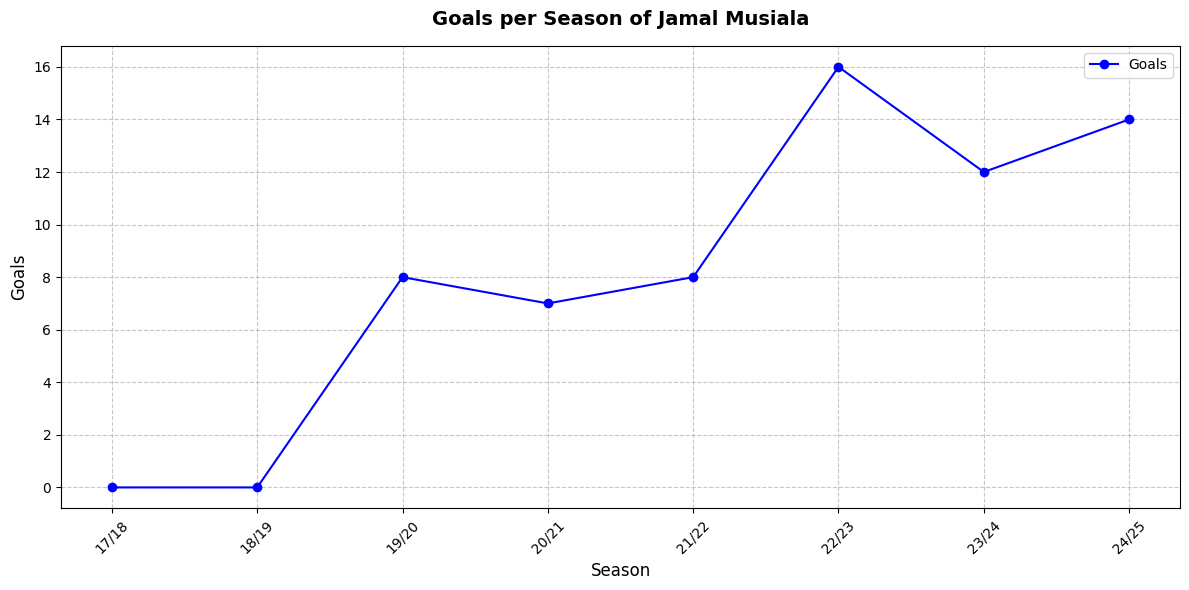

In [73]:
spieler_profil = pd.read_csv('spieler_profil.csv', delimiter=';')
player_id = 580195
player_profile = spieler_profil[spieler_profil['Spieler_id'] == player_id]
player_name = player_profile['Name'].values[0]
player_goals = seasonly_stats[seasonly_stats['spieler_id'] == player_id].copy()

# Duplikate entfernen
player_goals = player_goals.drop_duplicates()

# Saisons bereinigen und sortieren
player_goals['Saison'] = player_goals['Saison'].astype(str).str.replace("'", "").str.strip()

# Saison in Jahreszahlen umwandeln und sortieren
player_goals['Saison_start'] = player_goals['Saison'].str.split('/').str[0]
player_goals = player_goals[player_goals['Saison_start'].str.isdigit()]
player_goals['Saison_start'] = player_goals['Saison_start'].astype(int)
player_goals = player_goals.sort_values('Saison_start')

# Tore bereinigen
player_goals['Tore'] = pd.to_numeric(player_goals['Tore'], errors='coerce').fillna(0)

# Plot erstellen
plt.figure(figsize=(12, 6))
plt.plot(player_goals['Saison'], player_goals['Tore'], marker='o', linestyle='-', color='blue', label='Goals')
plt.title(f'Goals per Season of {player_name}', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Goals', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


### Line Chart market value of Yamal Musiala per season

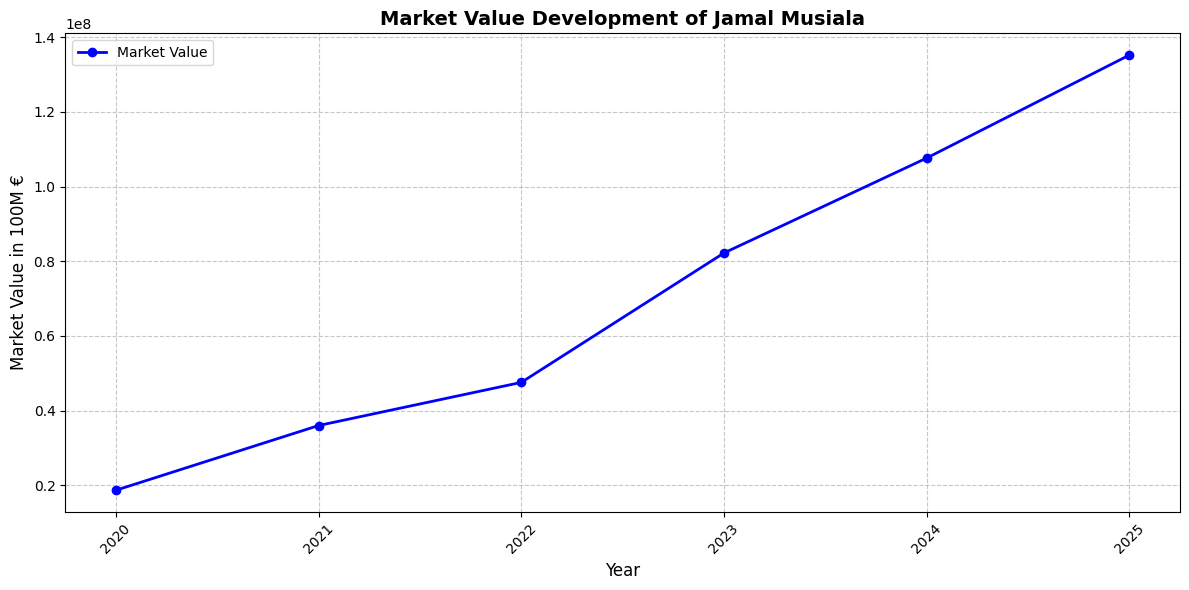

In [74]:
spieler_profil = pd.read_csv('spieler_profil.csv', delimiter=';')
player_id = 580195
player_profile = spieler_profil[spieler_profil['Spieler_id'] == player_id]
player_name = player_profile['Name'].values[0]
player_value = df_value[df_value['player_id'] == player_id].copy()

# Fehlende Werte entfernen und Daten korrekt formatieren
player_value['year'] = pd.to_numeric(player_value['year'], errors='coerce')
player_value['avg_market_value'] = pd.to_numeric(player_value['avg_market_value'], errors='coerce')
player_value = player_value.dropna(subset=['year', 'avg_market_value'])

# Nach Jahr sortieren
player_value = player_value.sort_values('year')

# Plot erstellen
plt.figure(figsize=(12, 6))
plt.plot(player_value['year'], player_value['avg_market_value'],
         marker='o', linestyle='-', color='blue', linewidth=2, markersize=6, label='Market Value')

plt.title(f'Market Value Development of {player_name}', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Market Value in 100M €', fontsize=12) # sonst wird es zu eng mit dem platz
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(player_value['year'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Musiala's Value is increasing every year

## Scatterplot-Matrix

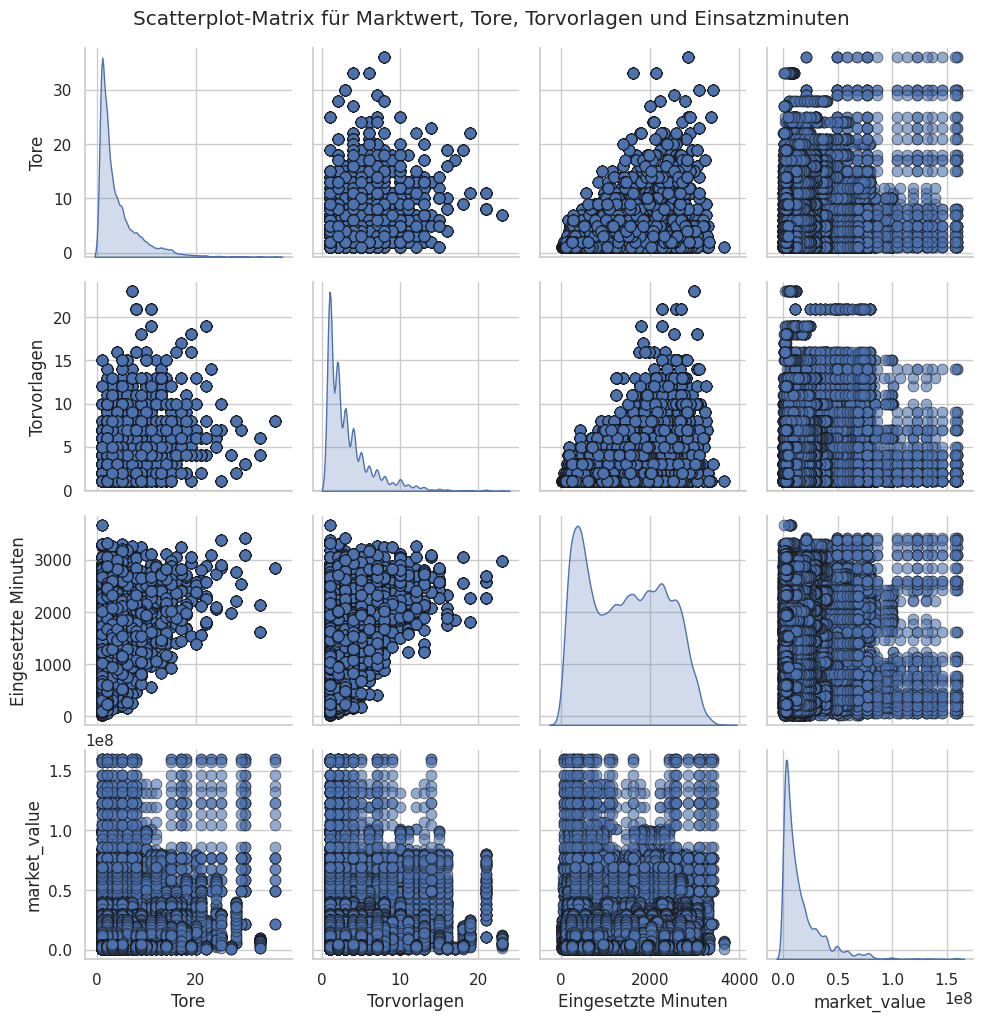

In [ ]:
# CSV-Dateien laden (Pfad anpassen)
combined_seasons = pd.read_csv("combined_seasons.csv", delimiter=";")
market_value_data = pd.read_csv("market_value_data.csv", delimiter=";")

# Umbenennen der Spieler-ID-Spalte zur Vereinheitlichung
combined_seasons.rename(columns={'spieler_id': 'Spieler_id'}, inplace=True)
market_value_data.rename(columns={'player_id': 'Spieler_id'}, inplace=True)

# Zusammenführen der Datensätze
merged_df = combined_seasons.merge(market_value_data, on='Spieler_id', how='left')

# Wichtige Spalten extrahieren
selected_columns = ['Tore', 'Torvorlagen', 'Eingesetzte Minuten', 'market_value']

# Konvertierung in numerische Werte
for col in selected_columns:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# NaN-Werte entfernen
filtered_df = merged_df[selected_columns].dropna()

# Verbesserte Scatterplot-Matrix mit KDE-Diagonalen und einheitlicher Ästhetik
sns.set(style="whitegrid", context="notebook")
sns.pairplot(filtered_df, diag_kind="kde", plot_kws={'alpha': 0.6, 's': 60, 'edgecolor': 'k'})
plt.suptitle("Scatterplot-Matrix für Marktwert, Tore, Torvorlagen und Einsatzminuten", y=1.02)
plt.show()

#### The scatterplot matrix shows that market value is partially correlated with goals and assists, but this relationship is not directly proportional. Minutes played do not have a clear impact on market value. Further analyses could help to better understand these relationships, especially by considering factors like player position, age, or injury history.

## Scatterplots and Pearsons correlaton coefficient

### Marketvalue vs age

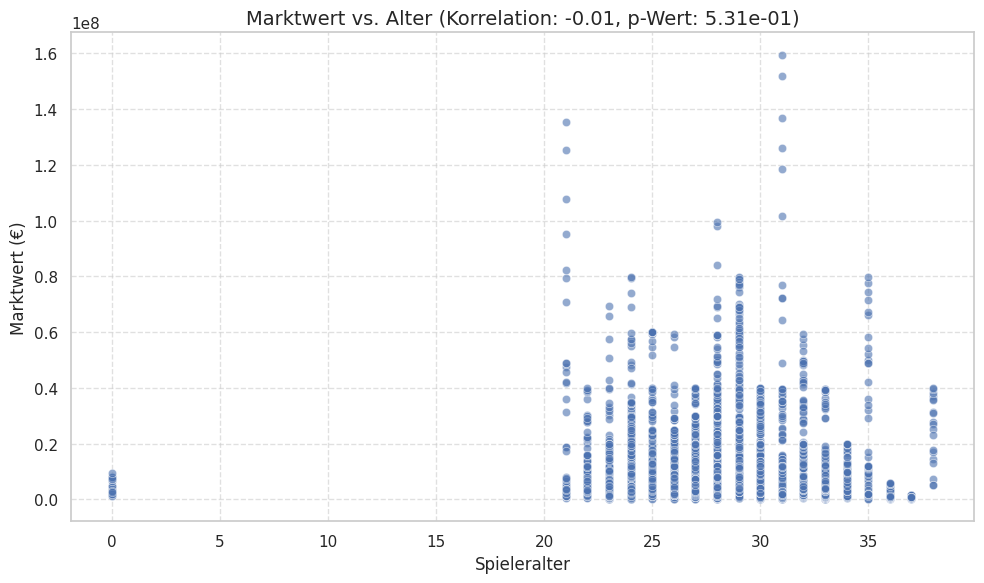

Korrelation zwischen Marktwert und Alter: -0.01
p-Wert: 5.31e-01


In [ ]:
# Spieleralter und Marktwert aus den beiden DataFrames verknüpfen
df_combined = pd.merge(df_spieler[['Spieler_id', 'Spieleralter']],
                       df_value[['player_id', 'avg_market_value']],
                       left_on='Spieler_id', right_on='player_id')

# Korrelation berechnen (pearsonr gibt den Korrelationskoeffizienten und den p-Wert zurück)
correlation, p_value = pearsonr(df_combined['Spieleralter'], df_combined['avg_market_value'])

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined, x='Spieleralter', y='avg_market_value', alpha=0.6)
plt.title(f"Marktwert vs. Alter (Korrelation: {correlation:.2f}, p-Wert: {p_value:.2e})", fontsize=14)
plt.xlabel('Spieleralter', fontsize=12)
plt.ylabel('Marktwert (€)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Ergebnisse ausgeben
print(f"Korrelation zwischen Marktwert und Alter: {correlation:.2f}")
print(f"p-Wert: {p_value:.2e}")


The connection between age and market value of a player seems to be almost non existent. Thats because it's not in only one direction young players get more expensive as they grow older because their skill improves and older players get cheaper every year because they can't perform as good as before. So the age has impact on the value but not if you masure it like that.

### Market Value vs Minutes Played

- Null Hypothesis (H₀): There is no linear correlation between the players' market value and their minutes played.
- Significance level (α): 0.05

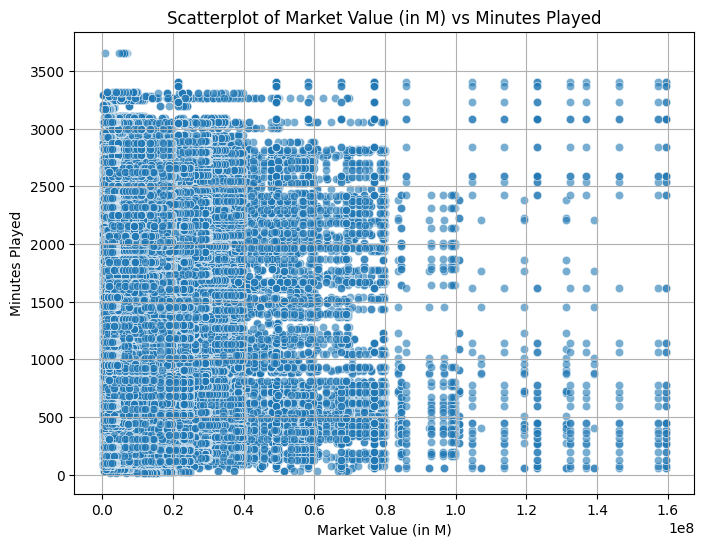

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=filtered_df['market_value'], y=filtered_df['Eingesetzte Minuten'], alpha=0.6)
plt.xlabel("Market Value (in M)")
plt.ylabel("Minutes Played")
plt.title("Scatterplot of Market Value (in M) vs Minutes Played")
plt.grid(True)
plt.show()

In [19]:
res = pearsonr(filtered_df['market_value'], filtered_df['Eingesetzte Minuten'])

print(f"Pearson's correlation coefficient (r): {res[0]:.4f}")
print(f"p-value: {res[1]:.4f}")

Pearson's correlation coefficient (r): -0.0588
p-value: 0.0000


Interpretation:

The scatterplot illustrates the relationship between market value and minutes played. The distribution of data points suggests that players with both high and low market values have varying amounts of playtime. There is no clear linear pattern indicating that players with higher market values consistently play more minutes.

The Pearson correlation coefficient (r) of -0.0588 confirms this observation, suggesting a very weak negative linear relationship between market value and minutes played. This means that as the market value increases, minutes played slightly decrease, but the effect is minimal.

The p-value of 0.0000 indicates that the result is statistically significant, meaning the null hypothesis (no linear correlation) can be rejected. However, despite this statistical significance, the correlation is extremely weak.

This weak relationship implies that other factors—such as player position, injuries, team strategies, or player age—may have a more substantial impact on playtime than market value alone.

#### Market Value vs Goals

- Null Hypothesis (H₀): There is no linear correlation between the players' market value and the number of goals they score.
- Significance level (α): 0.05

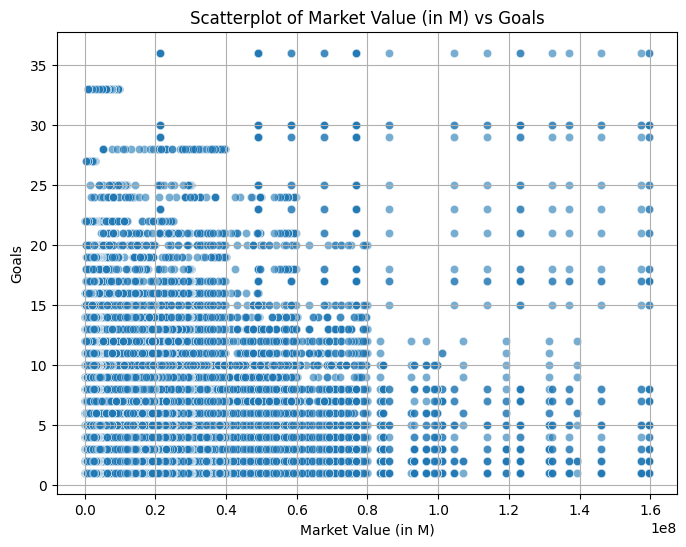

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=filtered_df['market_value'], y=filtered_df['Tore'], alpha=0.6)
plt.xlabel("Market Value (in M)")
plt.ylabel("Goals")
plt.title("Scatterplot of Market Value (in M) vs Goals")
plt.grid(True)
plt.show()

In [20]:
res = pearsonr(filtered_df['market_value'], filtered_df['Tore'])

print(f"Pearson's correlation coefficient (r): {res[0]:.4f}")
print(f"p-value: {res[1]:.4f}")

Pearson's correlation coefficient (r): 0.1168
p-value: 0.0000


Interpretation:

The plot above shows a concentration of players with lower market values who tend to score fewer goals. This suggests that the majority of players have a relatively low market value and contribute less to goal scoring. However, there are some players with higher market values who score more goals, although these cases are relatively rare. There is also a wide range of market values among players who score few goals, indicating that market value alone does not fully explain goal-scoring performance.

The Pearson correlation coefficient (r) of 0.1168 confirms this observation, suggesting a weak positive linear relationship between players' market values and their goals scored. This implies that while players with higher market values might score more goals, the relationship is not strong.

The p-value of 0.0000 indicates that this result is statistically significant, meaning the null hypothesis (no linear correlation) can be rejected. However, despite being statistically significant, the relationship between market value and goals scored remains weak. This suggests that other factors—such as player position, playing time, or team strategy—likely play a more significant role in determining a player's goal-scoring ability.

### Market Value vs Assists

- Null Hypothesis (H₀): There is no linear correlation between the players' market value and their number of assists.
- Significance level (α): 0.05

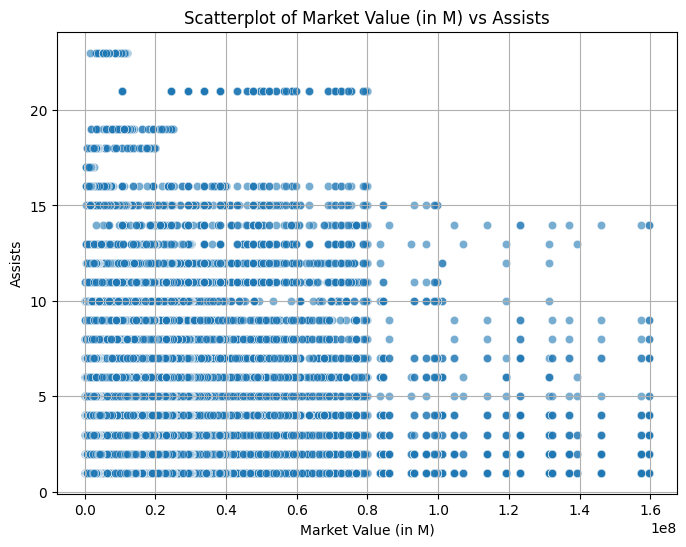

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=filtered_df['market_value'], y=filtered_df['Torvorlagen'], alpha=0.6)
plt.xlabel("Market Value (in M)")
plt.ylabel("Assists")
plt.title("Scatterplot of Market Value (in M) vs Assists")
plt.grid(True)
plt.show()

In [21]:
res = pearsonr(filtered_df['market_value'], filtered_df['Torvorlagen'])

print(f"Pearson's correlation coefficient (r): {res[0]:.4f}")
print(f"p-value: {res[1]:.4f}")

Pearson's correlation coefficient (r): 0.1015
p-value: 0.0000


Interpretation:

The plot above shows a concentration of players with lower market values who tend to provide fewer assists. This suggests that most players with a lower market value are less involved in creating scoring opportunities. However, a few players with higher market values contribute more assists, though these cases are relatively rare.

The Pearson correlation coefficient (r) of 0.1015 confirms this observation, indicating a very weak positive linear relationship between a player's market value and their number of assists. This suggests that players with higher market values might provide slightly more assists, but the relationship is not strong.

The p-value of 0.0000 shows that the result is statistically significant, meaning the null hypothesis (no linear correlation) can be rejected. Despite this statistical significance, the correlation remains weak, implying that other factors—such as player position, team tactics, or playing style—likely have a greater impact on a player's ability to provide assists.

## Heatmap

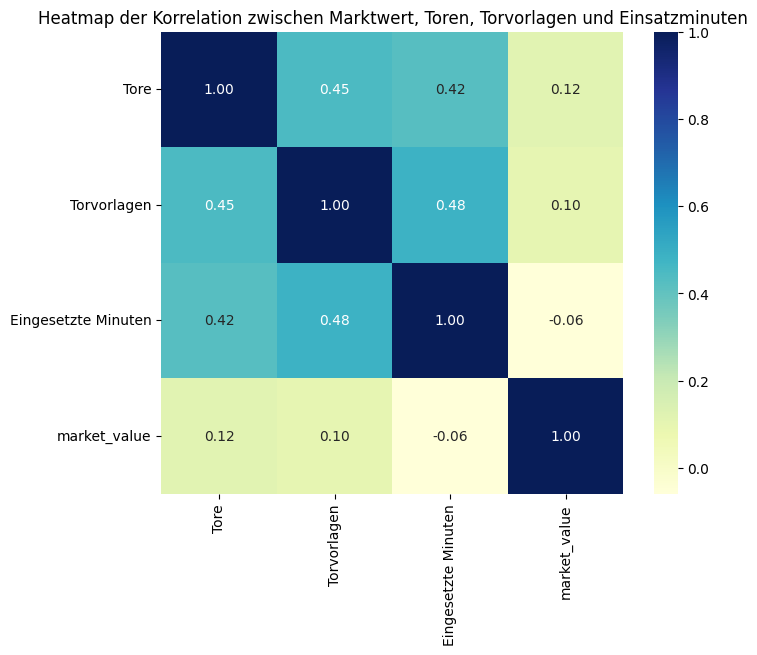

In [ ]:
# Wichtige Spalten extrahieren
selected_columns = ['Tore', 'Torvorlagen', 'Eingesetzte Minuten', 'market_value']

# Konvertierung in numerische Werte
for col in selected_columns:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# NaN-Werte entfernen
filtered_df = merged_df[selected_columns].dropna()

# Korrelationsmatrix berechnen
corr = filtered_df.corr()

# Heatmap erstellen
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, square=True)
plt.title("Heatmap der Korrelation zwischen Marktwert, Toren, Torvorlagen und Einsatzminuten")
plt.show()

### Interpretation

### 
- A correlation coefficient close to 1 indicates a strong positive correlation, while a coefficient close to -1 indicates a strong negative correlation. A coefficient near 0 suggests little to no linear correlation between the variables.

- Comparing Market Value with Goals and Assists, there is a moderate positive correlation (0.12 and 0.10, respectively). This suggests that players who score more goals or provide more assists tend to have higher market values, although the relationship is relatively weak.

- Market Value and Minutes Played show a weak positive correlation (0.16), indicating that players who play more minutes may have slightly higher market values. However, this relationship is not strong, implying other factors significantly influence market value.

- The correlation between Goals and Minutes Played (0.45) and between Assists and Minutes Played (0.48) shows a moderate positive correlation. This suggests that players who spend more time on the field are more likely to score goals and provide assists, which aligns with expectations.

- Goals and Assists have a relatively strong positive correlation (0.40), indicating that players who score more goals also tend to provide more assists. This could imply that offensive players contribute broadly to their team's attacking performance.

# Classification Modelling

### Classification with Random Forest, Accuracy, Precision and Recall

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

df_position_size = df_spieler[['Position', 'Groesse_in_M']].dropna()

position_mapping = {pos: idx for idx, pos in enumerate(df_position_size['Position'].unique())}
df_position_size['Position_Code'] = df_position_size['Position'].map(position_mapping)

X = df_position_size[['Groesse_in_M']]  
y = df_position_size['Position_Code']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=position_mapping.keys()))



Accuracy: 0.22
Precision: 0.13
Recall: 0.14

Classification Report:
                                    precision    recall  f1-score   support

                           Torwart       0.24      0.42      0.31        19
         Abwehr - Innenverteidiger       0.33      0.39      0.36        28
       Abwehr - Linker Verteidiger       0.11      0.22      0.15         9
      Abwehr - Rechter Verteidiger       0.25      0.08      0.12        12
Mittelfeld - Defensives Mittelfeld       0.00      0.00      0.00        12
 Mittelfeld - Zentrales Mittelfeld       0.14      0.18      0.16        17
Mittelfeld - Offensives Mittelfeld       0.40      0.33      0.36        12
               Sturm - Linksaussen       0.14      0.09      0.11        11
              Sturm - Rechtsaussen       0.00      0.00      0.00         6
            Sturm - Mittelstuermer       0.13      0.14      0.14        21
    Mittelfeld - Linkes Mittelfeld       0.00      0.00      0.00         1
   Mittelfeld - Rec

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespa

# Regression Modeling

## Lineaer Regression Model for...

 r-squared, mse

## Random Forest Regression

Weshalb wurde der Code im anderen Projekt genutzt? 
- Ein Random Forest Regressor wurde zur Vorhersage des Marktwerts verwendet, um nichtlineare Zusammenhänge besser abzubilden. (Feature Importance könnte man auch beachten)

Als Orierntierung folgende Dateien aus den Übungen verwenden:
- linear_regression.html
- regression_trees_random_forest.html

# k-means clustering (wird als Synonym für classification verwendet)

Als Orientierung folgende Dateien aus den Übungen verwenden:
- classification_analysis_supermarkets.html
- classification_analysis_titanic.html
- NLP_hotel_reviews_sentiment_prediction.html

# Correct interpretation of model results and measures of fit.

Für Regression verwendete Metriken: MSE, R-squared, fit, Interpretation

Für Classification verwendete Metriken: Accuracy, Precision, Recall, F1-Score, Confusion Matrix, MSE, R-squared, Model Evaluation

Frage 6 wird auch von solchen Metriken gesprochen, die man verwenden soll/darf.

# Integration and visualization of geographical data

In [71]:


# CSV-Datei mit den Stadiondaten laden
csv_file_path = "stadien_map.csv"
stadion_data = pd.read_csv(csv_file_path)

# Zentrum der Karte auf Deutschland setzen
m = folium.Map(location=[51.1657, 10.4515], zoom_start=6)

# Marker für jedes Stadion hinzufügen
for index, row in stadion_data.iterrows():
    if not pd.isna(row["x-Koordinaten"]) and not pd.isna(row["y-Koordinaten"]):
        folium.Marker(
            location=[row["x-Koordinaten"], row["y-Koordinaten"]],
            popup=f'{row["Verein"]} - {row["Stadionname"]}',
            tooltip=row["Verein"]
        ).add_to(m)

# Layer control
folium.LayerControl().add_to(m)

# Plot map
m